In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('d:/maschineLearning/zoomcamp/mlzoomcamp-2022-01-pensive-ride/exams.csv')

In [77]:
print(df.shape)
df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


# 1. Exploratory data analysis (EDA)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [79]:
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_')
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [80]:
categor_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
categor_columns, numerical_columns

(['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'],
 ['math_score', 'reading_score', 'writing_score'])

In [81]:
for col in categor_columns:
    df[col] = df[col].str.replace(' ', '_').str.replace('/', '_')
    
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group_A,high_school,standard,completed,67,67,63
1,female,group_D,some_high_school,free_reduced,none,40,59,55
2,male,group_E,some_college,free_reduced,none,59,60,50
3,male,group_B,high_school,standard,none,77,78,68
4,male,group_E,associate's_degree,standard,completed,78,73,68


In [82]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [83]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [84]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     77
reading_score                  73
writing_score                  76
dtype: int64

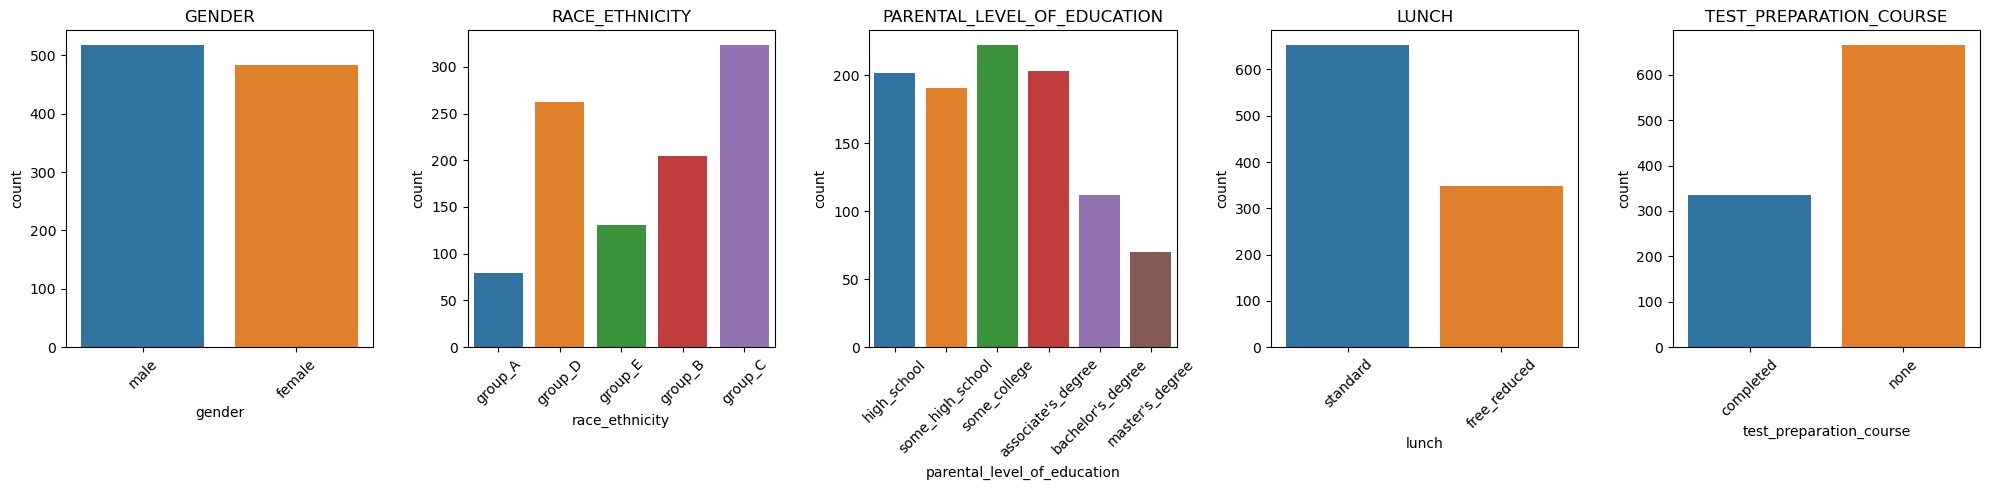

In [96]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5)

for i,col in enumerate(categor_columns):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45) 
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

## Feature importance

In [85]:
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group_A,high_school,standard,completed,67,67,63,65.666667
1,female,group_D,some_high_school,free_reduced,none,40,59,55,51.333333
2,male,group_E,some_college,free_reduced,none,59,60,50,56.333333
3,male,group_B,high_school,standard,none,77,78,68,74.333333
4,male,group_E,associate's_degree,standard,completed,78,73,68,73.000000


In [86]:
df['average_score'].describe()

count    1000.000000
mean       67.712000
std        14.514244
min        21.666667
25%        58.583333
50%        67.333333
75%        78.333333
max       100.000000
Name: average_score, dtype: float64

In [87]:
score_mean = df['average_score'].mean()
score_mean

67.71199999999993

In [88]:
for col in categor_columns:
    df_group = df.groupby(by=col)[col].agg(['count'])
    df_group['mean'] = df.groupby(by=col)['average_score'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - score_mean
    df_group['risk'] = df_group['mean'] / score_mean
    display(df_group)


,count,mean,diff,risk
gender,,,,
female,483,68.930987,1.218987,1.018003
male,517,66.573179,-1.138821,0.983181


,count,mean,diff,risk
race_ethnicity,,,,
group_A,79,66.915612,-0.796388,0.988239
group_B,205,65.336585,-2.375415,0.964919
group_C,323,64.679051,-3.032949,0.955208
group_D,262,71.204835,3.492835,1.051584
group_E,131,72.402036,4.690036,1.069264


,count,mean,diff,risk
parental_level_of_education,,,,
associate's_degree,203,70.211823,2.499823,1.036918
bachelor's_degree,112,73.303571,5.591571,1.082579
high_school,202,65.818482,-1.893518,0.972036
master's_degree,70,74.300000,6.588000,1.097294
some_college,222,66.692192,-1.019808,0.984939
some_high_school,191,62.549738,-5.162262,0.923761


,count,mean,diff,risk
lunch,,,,
free_reduced,348,60.873563,-6.838437,0.899007
standard,652,71.361963,3.649963,1.053904


,count,mean,diff,risk
test_preparation_course,,,,
completed,335,72.815920,5.103920,1.075377
none,665,65.140852,-2.571148,0.962028


In [91]:
df[numerical_columns].corrwith(df['average_score']).to_frame('correlation')

,correlation
math_score,0.919834
reading_score,0.970219
writing_score,0.966367


# 2. Data preparation

In [104]:
columns = categor_columns + ['average_score']
columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'average_score']

In [105]:
data = df[columns]

In [97]:
from sklearn.model_selection import train_test_split

In [111]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [112]:
len(df_train), len(df_val), len(df_test)

(600, 200, 200)

In [113]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
0,female,group_C,bachelor's_degree,standard,completed,76.666667
1,male,group_D,associate's_degree,standard,none,82.000000
2,male,group_B,some_college,standard,none,52.000000
3,female,group_C,high_school,standard,completed,92.000000
4,female,group_B,bachelor's_degree,free_reduced,none,69.666667
...,...,...,...,...,...,...
195,male,group_A,high_school,standard,none,48.000000
196,male,group_C,some_college,standard,none,51.000000
197,female,group_A,some_college,standard,none,82.333333
198,male,group_C,high_school,free_reduced,completed,81.000000


In [116]:
DATA_DIR = ('d:/maschineLearning/zoomcamp/mlzoomcamp-2022-01-pensive-ride')

In [118]:
df_train.to_csv(DATA_DIR + '/data/processed/train.csv')
df_test.to_csv(DATA_DIR + '/data/processed/test.csv')
df_val.to_csv(DATA_DIR + '/data/processed/val.csv')